In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Funciones de Activacion

En Deep Learning, despues de cada capa de neuronas, suele añadirse una función de activación. Esto se hace para introducir respuestas no lineales y así el modelo sea capaz de "aprender" funciones más complejas.

Las funciones de activación típicas son las siguientes:

## Escalón

La función escalón genera una respuesta binaria, uno si x es mayor que 0, cero en caso contrario. 

Esta se expresa de la siguiente manera:

\begin{align*}
s(x) = \biggl\{
\begin{matrix}
0 & if & 0>x\\
1 & if & x\geq 0
\end{matrix}
\end{align*}

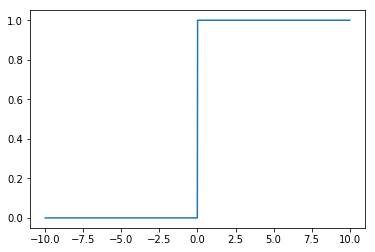

In [4]:
# Definimos nuestra funcion escalon
def step(x):
    # Funcion de activación de escalon
    # Args:
    #    x (int|list|np.array): Valores a los que se le aplicaran
    #        al escalon.
    #
    # Salidas:
    #    y (np.array): Valor del escalon correspondiente a x.
    y =  (x>=0).astype(np.float)
    return(y)

x = np.linspace(-10,10,1000) # Crea un arreglo de 1000 números que van del-10 al 10
y = step(x) # Calcula los valores en y
plt.plot(x,y) # Muestra la gráfica

## Sigmoide

También conocida como la función logística, en ciertas ocaciones nos interesará que el resultado de nuestro modelo esté dado en un rango de \[0,1\]. Si queremos decidir si un estudiante pasa el examen, o si queremos saber la probabilidad de que nuestro equipo favorito de futból gane el partido este estará dado por un porcentaje.

Cuando el valor de $x$ tiende a $-\infty$, $y$ se aporxima a cero. Por el contrario, si $x$ tiende a $\infty$, $y$ se acerca a uno.

Su ecuación esta definida como:

\begin{align*}
\sigma(x) = \frac{1}{1+e^{-x}}
\end{align*}

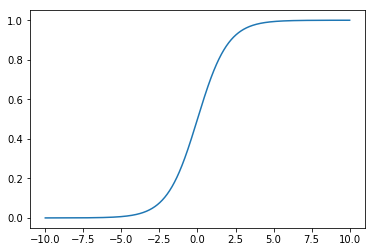

In [5]:
# Definimos nuestra funcion sigmoide
def sigmoid(x):
    # Funcion de activación sigmoide
    # Args:
    #    x (int|list|np.array): Valores a los que se le aplicará
    #        la sigmoide.
    #
    # Salidas:
    #    y (np.array): Valor de sigmoide correspondiente a x.
    y = 1/(1+np.exp(-x))
    return(y)

x = np.linspace(-10,10,1000) # Crea un arreglo de 1000 números que van del-10 al 10
y = sigmoid(x) # Calcula los valores en y
plt.plot(x,y) # Muestra la gráfica

## Tangente Hiperbólica

Similar a la funcion sigmoide, la tangente hiperbólica mapea las salidas del modelo a un invervalo \[-1,1\]. Cuando $x$ tiende a $-\infty$, $y$ se aproxima a $-1$. Cuando $x$ tiende a $\infty$, $y$ se acerca a $1$.

Su equación está expresada de la siguiente manera:

\begin{align*}
tanh(x) = \frac{1-e^{-2x}}{1+e^{-2x}}
\end{align*}

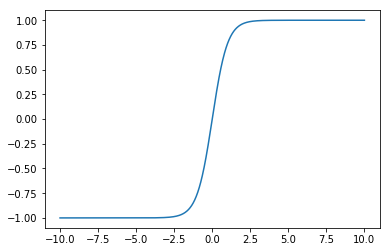

In [6]:
# Definimos nuestra funcion de tangente hiperbolica
def tanh(x):
    # Funcion de activación sigmoide
    # Args:
    #    x (int|list|np.array): Valores a los que se le aplicará
    #        la tangente hiperbolica.
    #
    # Salidas:
    #    y (np.array): Valor de la tangente hiperbolica correspondiente a x.
    num = 1-np.exp(-2*x)
    denom = 1+np.exp(-2*x)
    y = num/denom
    return(y)

x = np.linspace(-10,10,1000) # Crea un arreglo de 1000 numeros que van del-10 al 10
y = tanh(x) # Calcula los valores en y
plt.plot(x,y) # Muestra la grafica

## ReLU

Al transcurrir el tiempo, se empezó a notar que el trabajar con funciones de activación como la sigmoide o la tangente hiperbólica traen consigo un problema. En estas funciones, conforme más alejado sea el valor de entrada de cero más se reduce el valor del gradiente. Lo que se puede traducir en mayor cantidad de tiempo requerido para entrenar a nuestros modelos. En la siguiente figura se puede apreciar como el greadiente que está más alejado de cero tiende a aproximarse más a cero.

<img src="https://docs.google.com/drawings/d/e/2PACX-1vQnGebxk1DNDPYBFw9-QAKz3pUMmcSbHPOndAFuAf4RQxHtFMYOrW7EmG2yCEBGP0IzCweQHFq4wr5G/pub?w=483&h=439">

Para sobrellevar esto, se desarrollo la función de activación ReLU (Rectified Linear Unit, o Unidad de Rectificación Lineal en español). A diferencia de las funciones previamente discutidas, esta función mantiene intacto el valor de la salida de nuestro modelo mientras este sea mayor que cero, de lo contrario lo establece a cero.

La equación que la define es la siguiente:

\begin{align*}
ReLU(x) = max(0,x)
\end{align*}

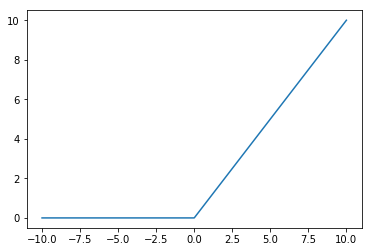

In [7]:
def relu(x):
    # Funcion de activación sigmoide
    # Args:
    #    x (int|list|np.array): Valores a los que se le aplicará
    #        la unidad de rectificacion lineal.
    #
    # Salidas:
    #    y (np.array): Valor de la unindad de rectificacion lineal correspondiente a x.
    y = np.maximum(0,x)
    return(y)

x = np.linspace(-10,10,1000) # Crea un arreglo de 1000 numeros que van del-10 al 10
y = relu(x) # Calcula los valores en y
plt.plot(x,y) # Muestra la grafica

## Leaky ReLU

El uso de ReLU se ha popularizado en los últimos años. Sin embargo, esta precenta el problema de "neuronas muertas". Esto quiere decir que en ocaciones los valores de los pesos son actualizados de tal forma que al utilizar esta función de activación las neuronas jamás se activarán sin importar el tipo de información que introdujamos. La salida de dichas neuronas siempre será cero. Debido a esto, se estábleció Leaky ReLU. Está, al igual que ReLU, no modifica el valor de salida de la neuron si es mayor que cero, pero a diferencia de la primera, si su valor es inferior a cero, el valor de salida será $\alpha$ su valor original. De esta manera aún tenemos una manera de propagar el gradiente por estas neuronas aún cuando su valor es menor que cero.

El valor típico que veremos de $\alpha$ es de 0.1.

Su función es la siguiente:

\begin{align*}
Leaky\_ReLU(x) = max(ax,x)
\end{align*}

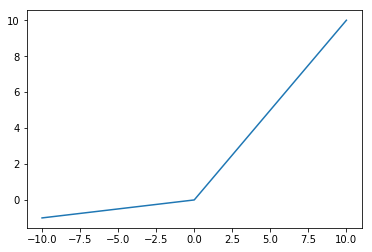

In [8]:
def leaky_relu(x,a=0.1):
    # Funcion de activación sigmoide
    # Args:
    #    x (int|list|np.array): Valores a los que se le aplicará
    #        lleaky relu.
    #    a (float): Pendiente para la parte negativa
    #
    # Salidas:
    #    y (np.array): Valor de leaky relu correspondiente a x.
    y = np.maximum(a*x,x)
    return(y)

x = np.linspace(-10,10,1000) # Crea un arreglo de 1000 numeros que van del-10 al 10
y = leaky_relu(x) # Calcula los valores en y
plt.plot(x,y) # Muestra la grafica

No es necesario el restringirnos a $\alpha = 0.1$. Podemos jugar con el a nuestra conveniencia.

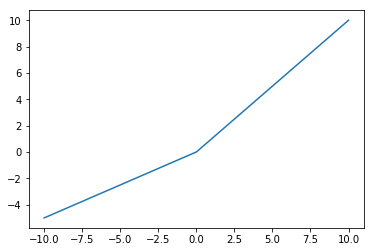

In [10]:
y = leaky_relu(x,a=0.5) # Calcula los valores en y
plt.plot(x,y) # Muestra la grafica

# Softmax

También conoccida como la función logistica multiclase, es una función exponencial normalizada que nos permite obtener valores en el rango de \[0,1\] para todas las salidas del modelo, y que al sumarse su valor es igual a 1.

Si tenemos un clasificador que reconoce las clases \[Perro,Gato,Caballo,Otro\] con esta función de activación podemos obtener la probabilidad de que nuestra entrada sea alguna de las clases anteriores. Por ejemplo, \[0.5,0.3,0.1,0.1\] indicaría que la clase Perro, con 0.5, tiene la mayor probabilidad de entre todas las clases.

Su función es la siguiente:

\begin{align}
\begin{matrix}
\sigma (x)_j = \frac{e^{z_j}}{\sum_{k=0}^{n}e^{z_k}} & for & j = 0,1,...,n
\end{matrix}
\end{align}

In [12]:
def softmax(x):
    # Función de activación multiclase.
    # Args:
    #    x (np.array): valores a los que se le aplicara softmax
    # Returns:
    #    out (np.array): Arreglo con los valores normalizados.
    exp = np.exp(x)
    # Para estabilidad numerica usar:
    #exp = np.exp(x-np.max(x))
    sum_e = np.sum(exp)
    out = exp/sum_e
    return(out)

Valores antes de que se les aplique la función softmax. La suma de los cuatro es mayor a uno.

<BarContainer object of 4 artists>

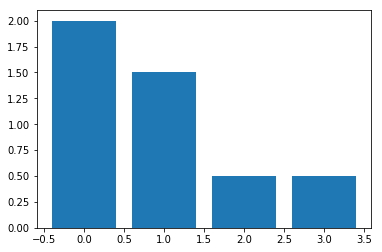

In [37]:
x = np.array([2,1.5,0.5,0.5])

# Variable auxiliar para dibujar las barras
haxis = np.arange(x.shape[0])
# Dibuja las barras con la información original
plt.bar(haxis,x)

Al aplicarse la función, todos los valores quedan en el rango \[0,1\], y la suma entre ellos da uno.

<BarContainer object of 4 artists>

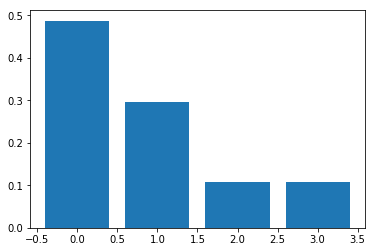

In [36]:
# Dibuja las barras con la información normalizada
y = softmax(x)
# Dibuja la gráfica
plt.bar(haxis,y)